In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
from IPython.display import display
import matplotlib.animation as animation

%matplotlib inline

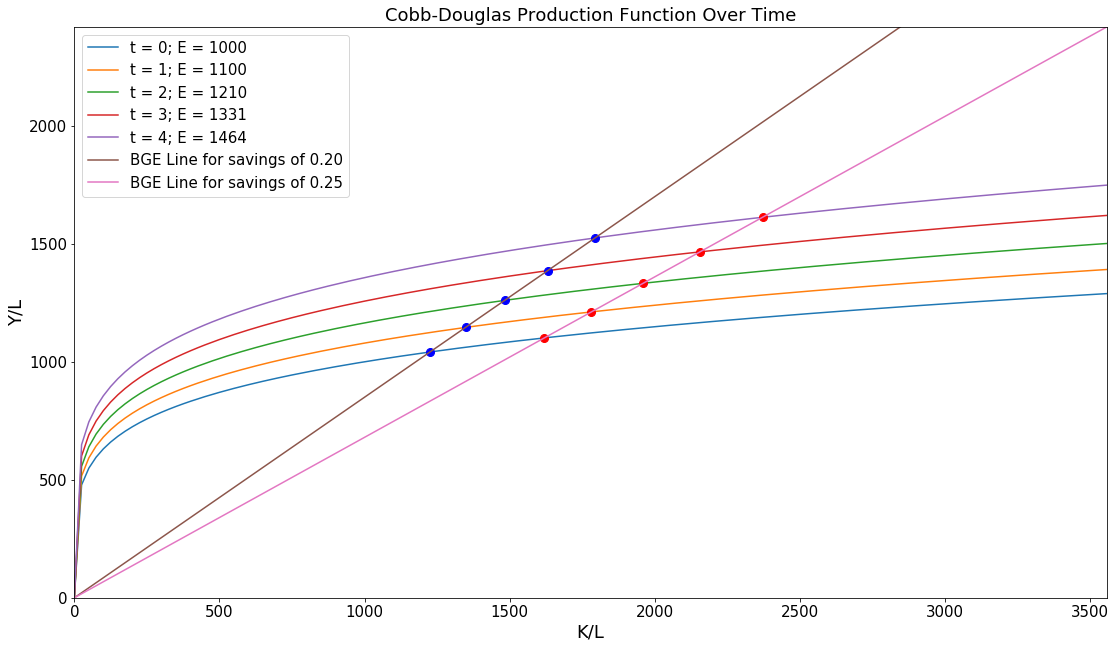

BGE values for savings of 0.20
t	Y/L		K/L		Y/L Growth	K/L Growth
0	1041.47		1225.25		n/a		n/a
1	1145.61		1347.78		0.10		0.10
2	1260.17		1482.56		0.10		0.10
3	1386.19		1630.81		0.10		0.10
4	1524.81		1793.90		0.10		0.10


BGE values for savings of 0.25
t	Y/L		K/L		Y/L Growth	K/L Growth
0	1101.22		1619.44		n/a		n/a
1	1211.34		1781.38		0.10		0.10
2	1332.47		1959.52		0.10		0.10
3	1465.72		2155.47		0.10		0.10
4	1612.29		2371.02		0.10		0.10


In [2]:
# version 1

k_over_l_values = np.arange(0, 20000, 25)
# number from lecture 2/13
e = 1000
g = .1 # exaggerated for visual effect (according to a 2015 BLS report, growth is at around 0.011)
n = 0.02
savings = 0.2
savings_2 = 0.25
depreciation = 0.05
alpha = .2 # please keep alpha at most .9, graph breaks down at values above 
y_over_k = (depreciation + g + n) / savings
y_over_k_2 = (depreciation + g + n) / savings_2
time_periods = 5

bge_vals = []
bge_vals_2 = []
    
    
if alpha > .6 or savings > 0.4 or savings_2 > 0.4 or g > .15:
    k_over_l_values = np.arange(0, 500000, 1000)
for i in range(time_periods):
    # graph the production function
    y_over_l_values = k_over_l_values ** alpha * e ** (1-alpha)
    plt.plot(k_over_l_values, y_over_l_values, label = "t = %d; E = %d" % (i,e))
    
    # plot the points on the equilibrium path associated with the particular value of E
    # savings of 0.2
    BGE_y_over_l = (1/y_over_k) ** (alpha / (1-alpha)) * e
    bge_vals.append((BGE_y_over_l, BGE_y_over_l * (1/y_over_k)))
    plt.plot([BGE_y_over_l * (1/y_over_k)], [BGE_y_over_l], marker='o', markersize=8, color="blue")
    # savings of 0.25
    BGE_y_over_l_2 = (1/y_over_k_2) ** (alpha / (1-alpha)) * e
    bge_vals_2.append((BGE_y_over_l_2, BGE_y_over_l_2 * (1/y_over_k_2)))
    plt.plot([BGE_y_over_l_2 * (1/y_over_k_2)], [BGE_y_over_l_2], marker='o', markersize=8, color="red")
    e = e * (1 + g)
plt.plot(k_over_l_values, k_over_l_values * y_over_k, label = "BGE Line for savings of %.2f" % savings)
plt.plot(k_over_l_values, k_over_l_values * y_over_k_2, label = "BGE Line for savings of %.2f" % savings_2)
plt.legend(prop={'size': 15/(time_periods//8 if time_periods > 8 else 1)})
plt.xlabel('K/L', fontsize=18)
plt.ylabel('Y/L', fontsize=18)
plt.title('Cobb-Douglas Production Function Over Time', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.axis([0, max(bge_vals + bge_vals_2, key=lambda x: x[1])[1] * 1.5, 
          0, max(bge_vals + bge_vals_2, key=lambda x: x[0])[0] * 1.5])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show(fig)
fig.savefig('prod_func.png', dpi=100)


def print_growth_rates(title, data):
    print(title)
    print("{}\t{}\t\t{}\t\t{}\t{}".format("t", "Y/L", "K/L", "Y/L Growth", 
                                      "K/L Growth"))
    for i in range(len(data)):
        if i > 0:
            print("{}\t{:.2f}\t\t{:.2f}\t\t{:.2f}\t\t{:.2f}".format(i, data[i][0], data[i][1], (data[i][0] - data[i-1][0]) / data[i-1][0], 
                                         (data[i][1] - data[i-1][1]) / data[i-1][1]))
        else:
            print("{}\t{:.2f}\t\t{:.2f}\t\t{}\t\t{}".format(i, data[i][0], data[i][1], "n/a", "n/a"))

print_growth_rates("BGE values for savings of %.2f" % savings, bge_vals)
print("\n")
print_growth_rates("BGE values for savings of %.2f" % savings_2, bge_vals_2)

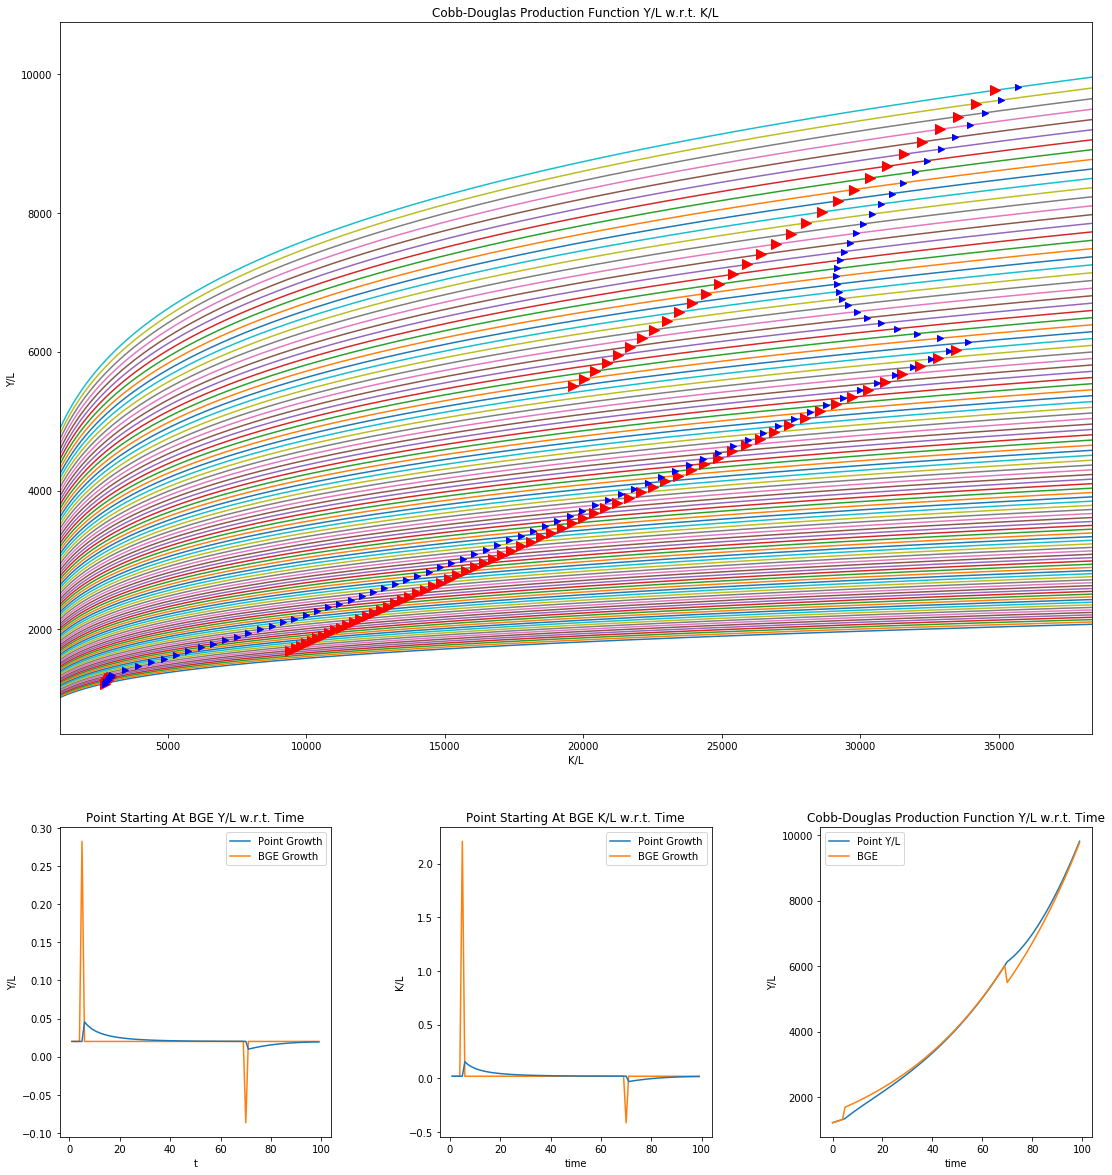

In [79]:
# version 2

k_over_l_values = np.arange(0, 20000, 25)
# number from lecture 2/13
e = 1000
g = .1 # exaggerated for visual effect (according to a 2015 BLS report, growth is at around 0.011)
n = 0.02
s = 0.2
savings = 0.2
savings_2 = 0.25
depreciation = 0.05
alpha = .2 # please keep alpha at most .9, graph breaks down at values above 
y_over_k = (depreciation + g + n) / savings
y_over_k_2 = (depreciation + g + n) / savings_2
time_periods = 5

class Change_Request:
    def __init__(self, time_period, param_to_change, new_val):
        self.time_period = time_period
        self.param_to_change = param_to_change
        self.new_val = new_val
        
class Properties:
    def __init__(self, alpha, e, g, n, s, d, delta_g = 0, 
                delta_n = 0, delta_d = 0, delta_s = 0):
        self.alpha = alpha
        self.e = e
        self.g = g
        self.n = n
        self.s = s
        self.d = d
        self.delta_g = delta_g
        self.delta_n = delta_n
        self.delta_d = delta_d
        self.delta_s = delta_s
    
    def grow_one_period(self):
        self.g = self.g * (1 + self.delta_g)
        self.n = self.n * (1 + self.delta_n)
        self.d = self.d * (1 + self.delta_d)
        self.s = self.s * (1 + self.delta_s)
        self.e = self.e * (1 + self.g)
        
    def copy(self):
        return Properties(self.alpha, self.e, self.g, self.n, self.s, self.d, self.delta_g, 
                self.delta_n, self.delta_d, self.delta_s)
        
def gen_single_point_data(alpha, e, g, n, s, d, k_over_l):
    y_over_l = k_over_l ** alpha * e ** (1-alpha)   
    return y_over_l
        
def gen_single_time_data(alpha, e, g, n, s, d, k_over_l_values):
    y_over_l_values = k_over_l_values ** alpha * e ** (1-alpha)
    y_over_k = (d + g + n) / s
    BGE_y_over_l = (1/y_over_k) ** (alpha / (1-alpha)) * e
    
    return y_over_l_values, BGE_y_over_l, y_over_k

def gen_multiple_time_data(props, k_over_l_values, start_time, end_time, point = None):
    data = {"t": [], "y_over_l": [], "y_over_k":[], "k_over_l":[], "bge": [], 
            "metadata": [], "point": []}
    for index, period in enumerate(range(start_time, end_time)):
        y_over_l_vals, BGE_y_over_l, y_over_k = gen_single_time_data(props.alpha, props.e, 
                                                           props.g, props.n, props.s, 
                                                           props.d, k_over_l_values)
        data["t"].append(period)
        data["y_over_l"].append(y_over_l_vals)
        data["bge"].append(BGE_y_over_l)
        data["y_over_k"].append(y_over_k)
        data["k_over_l"].append(k_over_l_values)
        data["metadata"].append(props.copy())
        if point:
            point[0] = gen_single_point_data(props.alpha, props.e, 
                                                props.g, props.n, props.s, 
                                                props.d, point[1])
            data["point"].append(copy.copy(point))
            savings = props.s * point[0]
            depreciation = (props.n + props.d) * point[1]
            point[1] = point[1] + savings - depreciation
            
        elif not point:
            data["point"].append(BGE_y_over_l)
        props.grow_one_period()
        
    return data
     

def plot_time_data(data, p):
    fig = plt.figure(figsize=(18.5, 20.5))
    grid = plt.GridSpec(3, 3, wspace=0.4, hspace=0.3)
    main = fig.add_subplot(grid[0:2, :])
    for index, row in data.iterrows():
        main.plot(row["k_over_l"], row["y_over_l"], label = "t = %d; E = %d" % (row["t"], row["metadata"].e), zorder=1)
    main.scatter(data["bge"] * (1/data["y_over_k"]), data["bge"], marker='>', c='Red', zorder=2, s=100)
    point_plot = main.scatter(data["point_k_over_l"], data["point_y_over_l"], marker='>', c='Blue', zorder=3)


    main.set_xlabel('K/L')
    main.set_ylabel('Y/L')
    main.set_xlim([min(data["bge"] * (1/data["y_over_k"])) * 0.4, max(data["bge"] * (1/data["y_over_k"])) * 1.1])
    main.set_ylim([min(data["bge"]) * 0.4, max(data["bge"]) * 1.1])
    main.set_title('Cobb-Douglas Production Function Y/L w.r.t. K/L')
    
    sub_1 = fig.add_subplot(grid[2, 2])
    sub_1.plot(data["t"], data["point_y_over_l"], label="Point Y/L")
    sub_1.plot(data["t"], data["bge"], label="BGE")
    sub_1.set_xlabel('time')
    sub_1.set_ylabel('Y/L')
    sub_1.legend()
    sub_1.set_title('Cobb-Douglas Production Function Y/L w.r.t. Time')
    
    sub_2 = fig.add_subplot(grid[2, 0])
    sub_2.plot(data["t"][1:], data["change_in_y_over_l"][1:], label = "Point Growth", zorder=3)
#     ax[1,0].plot(data["t"][1:], [p.g for _ in range(len(data["t"][1:]))], label="Balanced Growth (g(E))")
    sub_2.plot(data["t"][1:], data["change_in_bge_y_over_l"][1:], label = "BGE Growth", zorder=2)
    sub_2.set_xlabel('t')
    sub_2.set_ylabel('Y/L')
    sub_2.legend()
    sub_2.set_title('Point Starting At BGE Y/L w.r.t. Time')
    
    sub_3 = fig.add_subplot(grid[2, 1])
    sub_3.plot(data["t"][1:], data["change_in_k_over_l"][1:], label = "Point Growth", zorder=3)
#     ax[1,1].plot(data["t"][1:], [p.g for _ in range(len(data["t"][1:]))], label="Balanced Growth (g(E))")
    sub_3.plot(data["t"][1:], data["change_in_bge_k_over_l"][1:], label = "BGE Growth", zorder=2)
    sub_3.set_xlabel('time')
    sub_3.set_ylabel('K/L')
    sub_3.legend()
    sub_3.set_title('Point Starting At BGE K/L w.r.t. Time')
    plt.show()


def get_k_over_l_range(props, time):
    graph_scaling_factor = 1.1
    y_over_k, max_y_over_l, max_k_over_l = get_bge_y_over_l(props, time)
    top_k_over_l = max_k_over_l * graph_scaling_factor
    step_size = top_k_over_l / 10000
    return top_k_over_l, step_size

def get_bge_y_over_l(props, time):
    y_over_k = (props.g + props.n + props.d) / props.s
    y_over_l = (1 / y_over_k) ** (props.alpha / (1 - props.alpha)) * (props.e * (1 + props.g) ** time)
    k_over_l =  y_over_l / y_over_k
    return (y_over_k, y_over_l, k_over_l)

def combine_data(d1, d2):
    for key in list(d1.keys()):
        d1[key].extend(d2[key])
    return d1

def dynamic_change(props, total_time, change_requests = []):
    curr_time = 0
    change_requests = sorted(change_requests, key=lambda x: x.time_period)
    initial_data = get_bge_y_over_l(props, 0)
    initial_point = [initial_data[1], initial_data[2]]
    
    # range prediction
    temp_props = props.copy()
    for r in change_requests:
        setattr(temp_props, r.param_to_change, r.new_val)
    top_k_over_l, step_size = get_k_over_l_range(temp_props, total_time + 50)
    
    # actual loop
    consolidated_data = {"t": [], "y_over_l": [], "y_over_k":[], 
                     "k_over_l":[], "bge": [], "metadata": [], "point": []}
    for r in change_requests:
        consolidated_data = combine_data(consolidated_data, gen_multiple_time_data(props, np.arange(0, top_k_over_l, step_size), curr_time, 
                               r.time_period, point = initial_point))
        curr_time = r.time_period
        setattr(props, r.param_to_change, r.new_val)
    
    consolidated_data = combine_data(consolidated_data, gen_multiple_time_data(props, np.arange(0, top_k_over_l, step_size), curr_time, 
                               total_time, point = initial_point))
    return consolidated_data

def calc_percent_change(df):
    df["point_y_over_l"] = df["point"].apply(lambda x: x[0])
    df["point_k_over_l"] = df["point"].apply(lambda x: x[1])
    df["change_in_y_over_l"] = df["point_y_over_l"].pct_change().apply(lambda x: np.round(x, decimals=5))
    df["change_in_k_over_l"] = df["point_k_over_l"].pct_change().apply(lambda x: np.round(x, decimals=5))
    df["change_in_bge_y_over_l"] = df["bge"].pct_change().apply(lambda x: np.round(x, decimals=5))
    df["bge_k_over_l"] = df["bge"] * df["y_over_k"] ** -1
    df["change_in_bge_k_over_l"] = df["bge_k_over_l"].pct_change().apply(lambda x: np.round(x, decimals=5))
    return df
        
    
def produce_graphs(p, time_limit, changes):
    data = pd.DataFrame(dynamic_change(p, time_limit, changes))
    data = calc_percent_change(data)
    plot_time_data(data, p)
    
test_p = Properties(alpha, e, 0.02, n, s, depreciation)
original_test_p = test_p.copy()
test_changes = [Change_Request(5, "s", 0.50), Change_Request(70, "n", 0.07)]
produce_graphs(original_test_p, 100, test_changes)

Moving to webapp due to matplotlib animation restrictions.